In [26]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go 
from IPython.display import HTML
from plotly.subplots import make_subplots

In [73]:
# Dataset laden

config_path = os.path.join("..", "data", "final_dataset.csv")
data = pd.read_csv(config_path)

In [74]:
data.head()

,Breed,type,score,popularity ranking,size,intelligence,congential ailments,score for kids,size.1,$LIFETIME COST,...,LONGEVITY(YEARS),NUMBER OF GENETIC AILMENTS,GENETIC AILMENTS,PURCHASE PRICE,FOOD COSTS PER YEAR,GROOMING FREQUNCY,SUITABILITY FOR CHILDREN,origin_de,Breed_de,type_de
0,Border Terrier,terrier,3.61,61,1,Above average,none,4.99,small,22638.0,...,14.00,0,none,833.0,324.0,Once a week,1,Vereinigtes Königreich,Border Terrier,Terrier
1,Cairn Terrier,terrier,3.53,48,1,Above average,"'lion jaw', heart problems",4.91,small,21992.0,...,13.84,2,"'lion jaw', heart problems",435.0,324.0,Once a week,1,Schottland,Cairn Terrier,Terrier
2,Siberian Husky,working,3.22,16,2,Average,none,4.72,medium,22049.0,...,12.58,0,none,650.0,466.0,Once in a few weeks,1,Sibirien,Sibirischer Husky,Gebrauchshund
3,Welsh Springer Spaniel,sporting,3.34,81,2,Above average,hip problems,4.71,medium,20224.0,...,12.49,1,hip problems,750.0,324.0,Once a week,1,Wales,Walisischer Springer Spaniel,Jagdhund
4,English Cocker Spaniel,sporting,3.33,51,2,Excellent,none,4.70,medium,18993.0,...,11.66,0,none,800.0,324.0,Once a week,1,England,Englischer Cocker Spaniel,Jagdhund


# Lebenserwartung vs Popularität

In [75]:
correlation = data['LONGEVITY(YEARS)'].corr(data['popularity ranking'])
bestimmtheit = correlation**2
print(f"Korrelation: {correlation:.3f}, Bestimmtheitsmaß {bestimmtheit}")

Korrelation: 0.060, Bestimmtheitsmaß 0.003575555568841845


In [ ]:
fig = px.scatter(
    data,
    x='LONGEVITY(YEARS)',
    y='popularity ranking',
    hover_name='Breed_de',
    labels={"LONGEVITY(YEARS)": "Lebenserwartung (Jahre)", "popularity ranking": "Popularitäts-Ranking (Platz 1-87)"},
    title='Zusammenhang von Lebenserwartung und Popularität',
    color='popularity ranking',
    template="plotly_dark",
    color_continuous_scale="rainbow"
)

fig.update_layout(
    title_x=0.5,
    title_xanchor='center',
    title_font_size=24 
)

# Weiße Umrandung um die Marker
fig.update_traces(
    marker=dict(
        size = 10,
        line=dict(
            width=1, 
            color= 'white'
        )
    )
)


fig.update_xaxes(
    tickmode="linear",
    dtick=1,
    range=[int(data["LONGEVITY(YEARS)"].min()) - 1, int(data["LONGEVITY(YEARS)"].max()) + 1],
)

fig.update_yaxes(
    autorange='reversed',
    tickmode='array',
    dtick=10,
    tickvals=[1, 10, 20, 30, 40, 50, 60, 70, 80]
)

fig.update_coloraxes(showscale=False)

fig.add_annotation(
    text=f"Korrelation: {correlation:.4f}<br>Bestimmtheitsmaß: {bestimmtheit:.4f}",
    x=1.0,  # Position relativ zur Plot-Breite (0-1)
    y=0.02,  # Position relativ zur Plot-Höhe (0-1)
    xref="paper",
    yref="paper",
    showarrow=False,
    font=dict(
        family="Trebuchet MS",
        size=14,
        color="#2c3272"
    ),
    bgcolor="rgba(255,255,255,0.8)",  # Halbtransparenter weißer Hintergrund
    bordercolor="#2c3272",
    borderwidth=1,
    align="right",
    xanchor="right",  # Textbox wird rechts verankert
    yanchor="bottom"  # Textbox wird unten verankert
)

fig.show()

#fig.write_html('age_ranking.html')

Lebenserwartung und Beliebtheit statistisch in einem schwachen Zusammenhang miteinander (±0.1-0.3 = schwacher Zusammenhang
±0.3-0.5 = mittlerer Zusammenhang)

# Hundegruppe vs Popularität

In [ ]:
fig = px.scatter(
    data,
    x='type_de',
    y='popularity ranking',
    hover_name='Breed_de',
    labels={"type_de": "Hundegruppe", "popularity ranking": "Popularitäts-Ranking (Platz 1-87)"},
    title='Zusammenhang von Hundegruppe und Popularität',
    color='popularity ranking',
    template="plotly_dark",
    color_continuous_scale="rainbow"
)

fig.update_layout(
    title_x=0.5,
    title_xanchor='center',
    title_font_size=24 
    
)

# Weiße Umrandung um die Marker
fig.update_traces(
    marker=dict(
        size = 10,
        line=dict(
            width=1,
            color = 'white'

        )
    )
)


fig.update_yaxes(
    autorange='reversed',
    tickmode='array',
    dtick=10,
    tickvals=[1, 10, 20, 30, 40, 50, 60, 70, 80]
)

fig.update_coloraxes(showscale=False)


fig.show()

#fig.write_html('type_ranking.html')

An dieser Karte mit Hover-Funktion kann man ablesen, welche Rassen in der jeweiligen Gruppe wie beliebt sind. So ist z.B. der German Shepherd

# Krankheiten

In [78]:
# krankheiten in hover

# vielleicht ein dropdown für je eine hundeart und dann als darstellung die krankheit als print?

In [79]:
data['GENETIC AILMENTS'].unique()

array(['none', "'lion jaw', heart problems  ", 'hip problems',
       'eye, skin problems', 'dry eye',
       'hip, eye, skin problems; enzyme deficiency',
       'eye problems, deafness, skin + heart problems, blood clotting disorders',
       "'lion jaw', 'dry eye', skin problems", 'elbows, hips, eyes',
       'hip, eye problems', 'eye problems', 'elbows, hips, eyes, heart ',
       'cataracts, hair loss, heart, eye, blood clotting disorders',
       'no data', 'deafness, hip problems', "'dry eye'",
       'liver, sinus problems', 'heart problems',
       'eye problems, deafness', 'breathing problems',
       'liver, eye problems', 'heart, spinal problems',
       'deafness, urinary stones', 'epilepsy, eye problems',
       'blood, skin disorders', 'fatal stomach bloat, skin disorder',
       'cataracts + other eye problems, connective tissue, nerves, kidneys, spine, blood clotting disorders',
       'blood vessel disorders', 'skin, spinal problems', 'knee problems',
       'heart, s

In [80]:
def simplify_ailments(ailment_string):
    if ailment_string in ['none', 'no data']:
        return 'Keine/Unbekannt'
    elif 'eye' in ailment_string.lower():
        return 'Augenprobleme'
    elif 'hip' in ailment_string.lower():
        return 'Hüftprobleme'
    elif 'heart' in ailment_string.lower():
        return 'Herzprobleme'
    elif 'skin' in ailment_string.lower():
        return 'Hautprobleme'
    else:
        return 'Andere'

data['Simplified_Ailments'] = data['GENETIC AILMENTS'].apply(simplify_ailments)

# Verteilung anzeigen
print(data['Simplified_Ailments'].value_counts())

Simplified_Ailments
Hüftprobleme       24
Keine/Unbekannt    23
Augenprobleme      21
Herzprobleme        8
Andere              7
Hautprobleme        4
Name: count, dtype: int64


In [81]:
# Häufigkeiten zählen
ailment_counts = data['Simplified_Ailments'].value_counts()

# Pie Chart erstellen
fig = px.pie(
    values=ailment_counts.values,
    names=ailment_counts.index,
    title='Verteilung der genetischen Krankheiten bei Hunderassen',
    template='plotly_dark'
)

# Styling anpassen
fig.update_layout(
    font=dict(
        family="Verdana",
        size=14,
        color="white"
    ),
    title_font=dict(
        family="Verdana",
        size=20,
        color="white"
    ),
    title_x=0.5,
    title_xanchor='center'
)

# Prozentwerte und Anzahl anzeigen
fig.update_traces(
    textposition='inside',
    textinfo='percent+label',
    hovertemplate='<b>%{label}</b><br>' +
                  'Anzahl: %{value}<br>' +
                  'Anteil: %{percent}<br>' +
                  '<extra></extra>',
    marker=dict(
        line=dict(color='white', width=2)
    )
)

fig.show()

In [ ]:
# Häufigkeiten zählen und nach Häufigkeit sortieren
ailment_counts = data['Simplified_Ailments'].value_counts()

# Bar Chart erstellen
fig = px.bar(
    x=ailment_counts.index,
    y=ailment_counts.values,
    title='Verteilung der genetischen Krankheiten bei Hunderassen',
    labels={'x': 'Krankheitskategorie', 'y': 'Anzahl Rassen'},
    template='plotly_dark',
    color=ailment_counts.index
)

# Styling anpassen
fig.update_layout(
    title_x=0.5,
    title_xanchor='center',
    showlegend=False,
    title_font_size = 24
)

# Balken mit weißer Umrandung
fig.update_traces(
    marker=dict(
        line=dict(color='white', width=1)
    ),
    # Hover-Informationen
    hovertemplate='<b>%{x}</b><br>' +
                  'Anzahl: %{y} Rassen<br>' +
                  'Anteil: %{customdata:.1f}%<br>' +
                  '<extra></extra>',
    customdata=[(count / len(data)) * 100 for count in ailment_counts.values]
)

# Achsen anpassen
fig.update_xaxes(
    tickangle=45,
    title_font=dict(size=16, color="white"),
    tickfont=dict(size=12, color="white")
)

fig.update_yaxes(
    title_font=dict(size=16, color="white"),
    tickfont=dict(size=12, color="white")
)

# Farbskala ausblenden
fig.update_coloraxes(showscale=False)

fig.show()

#fig.write_html('count_ailments.html')



In [83]:
# Vorbereitung der Daten
data['Simplified_Ailments'] = data['GENETIC AILMENTS'].apply(simplify_ailments)

# Erstellen des Scatter-Plots
fig = px.scatter(
    data,
    x='Simplified_Ailments',  # Verwenden Sie die kategorisierten Krankheiten
    y='popularity ranking',
    hover_name='Breed',
    labels={
        "Simplified_Ailments": "Häufige Krankheiten", 
        "popularity ranking": "Popularitäts-Ranking (1 = beliebtester)"
    },
    title='Zusammenhang zwischen Hundekrankheiten und Rassenpopularität',
    color='popularity ranking',  # Farbe nach Krankheitskategorie
    category_orders={"Simplified_Ailments": ["Keine/Unbekannt", "Augenprobleme", "Hüftprobleme", 
                                           "Herzprobleme", "Hautprobleme", "Andere"]}
)

# Layout-Anpassungen
fig.update_layout(
    font=dict(
        family="Trebuchet MS",
        size=12,
        color="#2c3272",
    ),
    title_font=dict(
        family="Trebuchet MS",
        size=20,
        color="#2c3272" 
    ),
    title_x=0.5,
    xaxis_title="Krankheitskategorie",
    yaxis_title="Popularitäts-Ranking (1-87)",
    showlegend=True,
    legend_title_text="Krankheitskategorie"
)

# Y-Achse anpassen (höhere Zahlen = weniger populär)
fig.update_yaxes(
    autorange='reversed',
    tickmode='array',
    tickvals=list(range(1, 88, 5))
)

# Marker anpassen
fig.update_traces(
    marker=dict(
        size=12,
        opacity=0.7,
        line=dict(width=1, color='DarkSlateGrey')
    )
)

fig.show()

In [ ]:
fig = px.box(
    data,
    x='Simplified_Ailments',
    y='popularity ranking',
    color='Simplified_Ailments',
    title='Popularitäts-Ranking nach Krankheitskategorie',
    template = 'plotly_dark'
)
fig.update_yaxes(
    autorange='reversed', 
    title = 'Popularität',
    tickmode='array',
    dtick=10,
    tickvals=[1, 10, 20, 30, 40, 50, 60, 70, 80]
)
fig.update_xaxes(
    title = 'Krankheitskategorie'
 )

fig.update_layout(
    title_x=0.5,
    title_xanchor='center',
    showlegend=False,
    title_font_size = 24
)

#fig.write_html('ranking_ailments.html')

Die Grafik zeigt, dass Rassen mit Hautproblemen eine relativ gleichmäßige Beliebtheit aufweisen (geringe Streuung der Datenpunkte). Im Gegensatz dazu variiert die Beliebtheit von Rassen mit Augenproblemen deutlich stärker – einige sind sehr beliebt, andere weniger.

In [85]:
fig = px.violin(
    data,
    x='Simplified_Ailments',
    y='popularity ranking',
    color='Simplified_Ailments',
    box=True,
    title='Verteilung der Popularität nach Krankheitskategorie',
    template = 'plotly_dark'
)
fig.update_xaxes(
    autorange='reversed', 
    title = 'Krankheitskategorie')

fig.update_yaxes(
    autorange='reversed', 
    title = 'Popularität',
    tickmode='array',
    dtick=10,
    tickvals=[1, 10, 20, 30, 40, 50, 60, 70, 80]
)
fig.update_layout(
    title_x=0.5,
    title_xanchor='center',
    showlegend=False,
    title_font_size = 24
)


#fig.write_html('ranking_ailments_violin.html')

In [86]:
#woher kommen die gesündesten Hunde

healthiest_breed_origins = data[data['GENETIC AILMENTS'] == 'none']
healthiest_breed_origins.head()


,Breed,type,score,popularity ranking,size,intelligence,congential ailments,score for kids,size.1,$LIFETIME COST,...,NUMBER OF GENETIC AILMENTS,GENETIC AILMENTS,PURCHASE PRICE,FOOD COSTS PER YEAR,GROOMING FREQUNCY,SUITABILITY FOR CHILDREN,origin_de,Breed_de,type_de,Simplified_Ailments
0,Border Terrier,terrier,3.61,61,1,Above average,none,4.99,small,22638.0,...,0,none,833.0,324.0,Once a week,1,Vereinigtes Königreich,Border Terrier,Terrier,Keine/Unbekannt
2,Siberian Husky,working,3.22,16,2,Average,none,4.72,medium,22049.0,...,0,none,650.0,466.0,Once in a few weeks,1,Sibirien,Sibirischer Husky,Gebrauchshund,Keine/Unbekannt
4,English Cocker Spaniel,sporting,3.33,51,2,Excellent,none,4.70,medium,18993.0,...,0,none,800.0,324.0,Once a week,1,England,Englischer Cocker Spaniel,Jagdhund,Keine/Unbekannt
10,Brittany,sporting,3.54,30,2,Excellent,none,4.42,medium,22589.0,...,0,none,618.0,466.0,Once a week,2,Frankreich,Epagneul Breton,Jagdhund,Keine/Unbekannt
13,Tibetan Spaniel,non-sporting,3.02,73,1,Average,none,4.40,small,25549.0,...,0,none,1050.0,466.0,Once a week,1,Tibet,Tibetspaniel,Begleithund,Keine/Unbekannt


In [92]:
health_counts = (
    healthiest_breed_origins.groupby('origin_de')
    .size()  # Zählt die Anzahl der Einträge pro Gruppe
    .reset_index(name='count')  # Umwandeln in DataFrame mit Spalten 'origin_de' und 'count'
)

fig = px.bar(
    health_counts,
    x='origin_de',
    y='count',
    title='Herkunftsländer der gesündesten Hunderassen',
    labels={'origin_de': 'Herkunftsland', 'count': 'Anzahl gesunder Rassen'},
    color='origin_de', 
    template='plotly_dark',
)

fig.update_layout(
    title_x=0.5,
    title_xanchor='center',
    showlegend=False,
    title_font_size = 24
)

fig.update_xaxes(categoryorder='total descending')

fig.show()

#fig.write_html('origin_healthiest_breeds.html')

Alle angegebenen Länder haben Hunderassen hervorgebracht, die keinerlei genetische Vorerkrankungen haben. England hat mit 4 die meisten. Hier ist zu beachten, dass England insgesamt mehr Hunderassen hervorgebracht hat als z.B. Ägypten.

durchschnitt der gesunden rassen pro land
also wie viele none durch anzahl hunderassen insgesamt



In [27]:

total_breeds_per_country = (
    data['origin_de'].value_counts()
    .reset_index(name='total_count')
    .rename(columns={'index': 'origin_de'})
)

healthy_breeds_per_country = (
    healthiest_breed_origins['origin_de']
    .value_counts()
    .reset_index(name='healthy_count')
    .rename(columns={'index': 'origin_de'})
)

merged_stats = pd.merge(
    healthy_breeds_per_country,
    total_breeds_per_country,
    on='origin_de',
    how='left'
).sort_values('healthy_count', ascending=False)

merged_stats['health_percentage'] = (
    (merged_stats['healthy_count'] / merged_stats['total_count']) * 100
).round(1)

# 2. Subplots erstellen
fig = make_subplots(
    rows=2, cols=1,
    subplot_titles=(
        'Absolute Anzahl gesunder Rassen pro Land',
        'Anteil gesunder Rassen (%)'
    ),
    vertical_spacing=0.3
)

# Plot 1: Absolute Anzahl (Balkendiagramm)
fig.add_trace(
    go.Bar(
        x=merged_stats['origin_de'],
        y=merged_stats['healthy_count'],
        name='Absolute Anzahl',
        text=merged_stats['healthy_count'],
        textposition='auto'
    ),
    row=1, col=1
)

# Plot 2: Prozentualer Anteil (Balkendiagramm)
fig.add_trace(
    go.Bar(
        x=merged_stats['origin_de'],
        y=merged_stats['health_percentage'],
        name='Anteil (%)',
        text=merged_stats['health_percentage'].astype(str) + '%',
        textposition='auto'
    ),
    row=2, col=1
)

# 3. Layout anpassen
fig.update_layout(
    height=800,
    title_text='Gesunde Hunderassen nach Herkunftsland',
    title_x=0.5,
    title_font_size=24,
    showlegend=False,
    template='plotly_dark'
)

# X-Achsen drehen und Titel anpassen
fig.update_xaxes(tickangle=45, row=1, col=1)
fig.update_xaxes(tickangle=45, row=2, col=1)
fig.update_yaxes(title_text='Anzahl', row=1, col=1)
fig.update_yaxes(title_text='Anteil (%)', row=2, col=1)

fig.show()
fig.write_html('combined_healthy_breeds_plot.html')

Oben: Alle angegebenen Länder haben Hunderassen hervorgebracht, die keinerlei genetische Vorerkrankungen haben. England hat mit 4 die meisten. Hier ist zu beachten, dass England insgesamt mehr Hunderassen hervorgebracht hat als z.B. Ägypten.

Unten: Hier sieht man hingegen den Durchschnitt der gesunden Rassen pro Land. Hier schneidet England deutlich schlechter ab, denn nur 33,3 % der Rassen (4) sind genetisch nicht vorbelastet. 


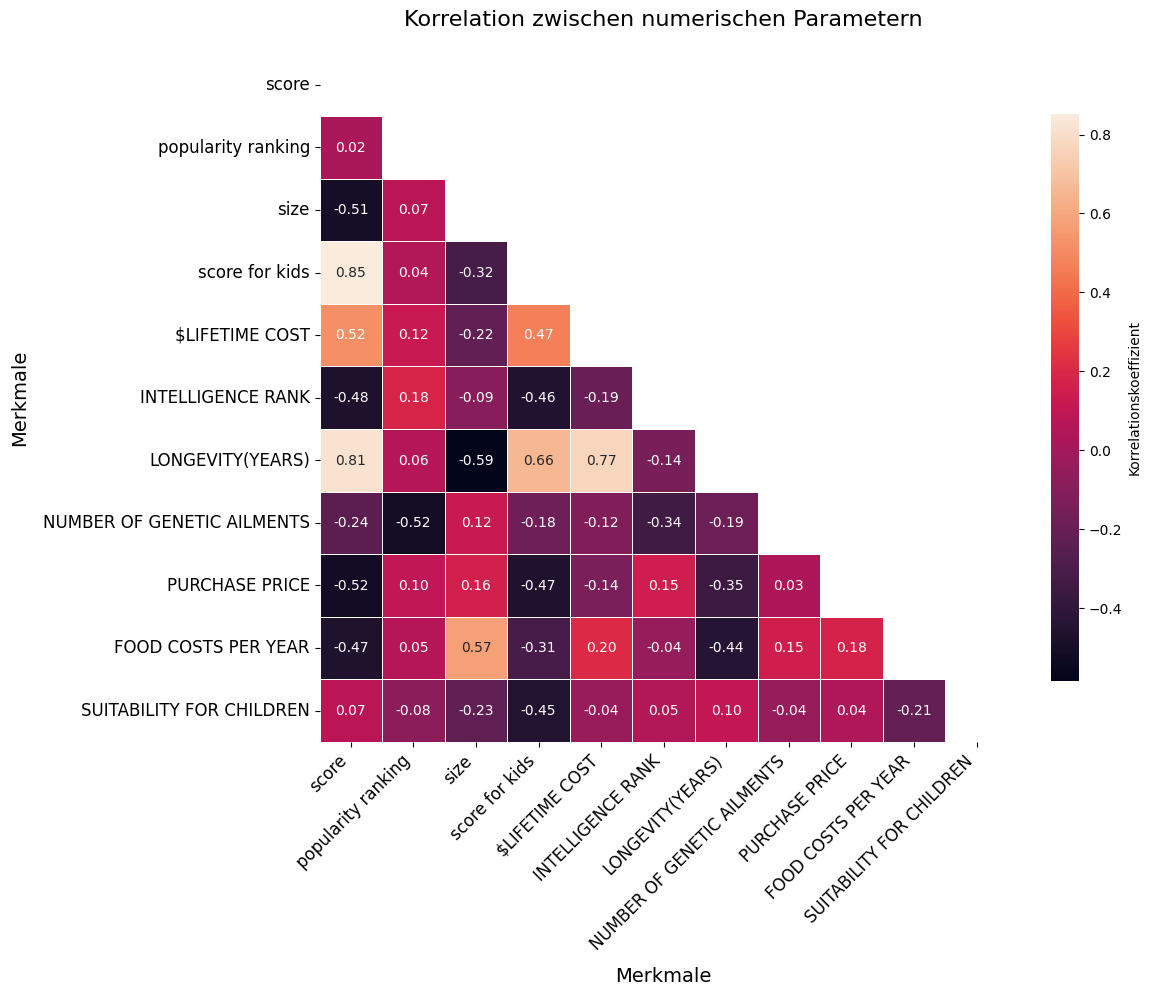

In [ ]:
def plot_correlation_heatmap(df):
    # 1. Nur numerische Spalten wählen
    numeric_df = df.select_dtypes(include=[np.number])
    corr = numeric_df.corr()
    # 2. Maske für das obere Dreieck
    mask = np.triu(np.ones_like(corr, dtype=bool))
    # 3. Plot-Setup
    plt.figure(figsize=(12, 10))
    sns.heatmap(
        corr,
        mask=mask,
        annot=True,
        fmt=".2f",
        # cmap='viridis',
        square=True,
        linewidths=0.5,
        cbar_kws={
            'label': 'Korrelationskoeffizient',
            'shrink': .8,
            'orientation': 'vertical'
        },
        annot_kws={'fontsize': 10}  # Schriftgröße der Werte
    )
    # 4. Titel & Achsenbeschriftungen mit individuellen Fontgrößen
    plt.title('Korrelation zwischen numerischen Parametern', fontsize=16, pad=20)
    plt.xlabel('Merkmale', fontsize=14, labelpad=10)
    plt.ylabel('Merkmale', fontsize=14, labelpad=10)
    # 5. Tick-Schriftgrößen anpassen
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()

plot_correlation_heatmap(data)

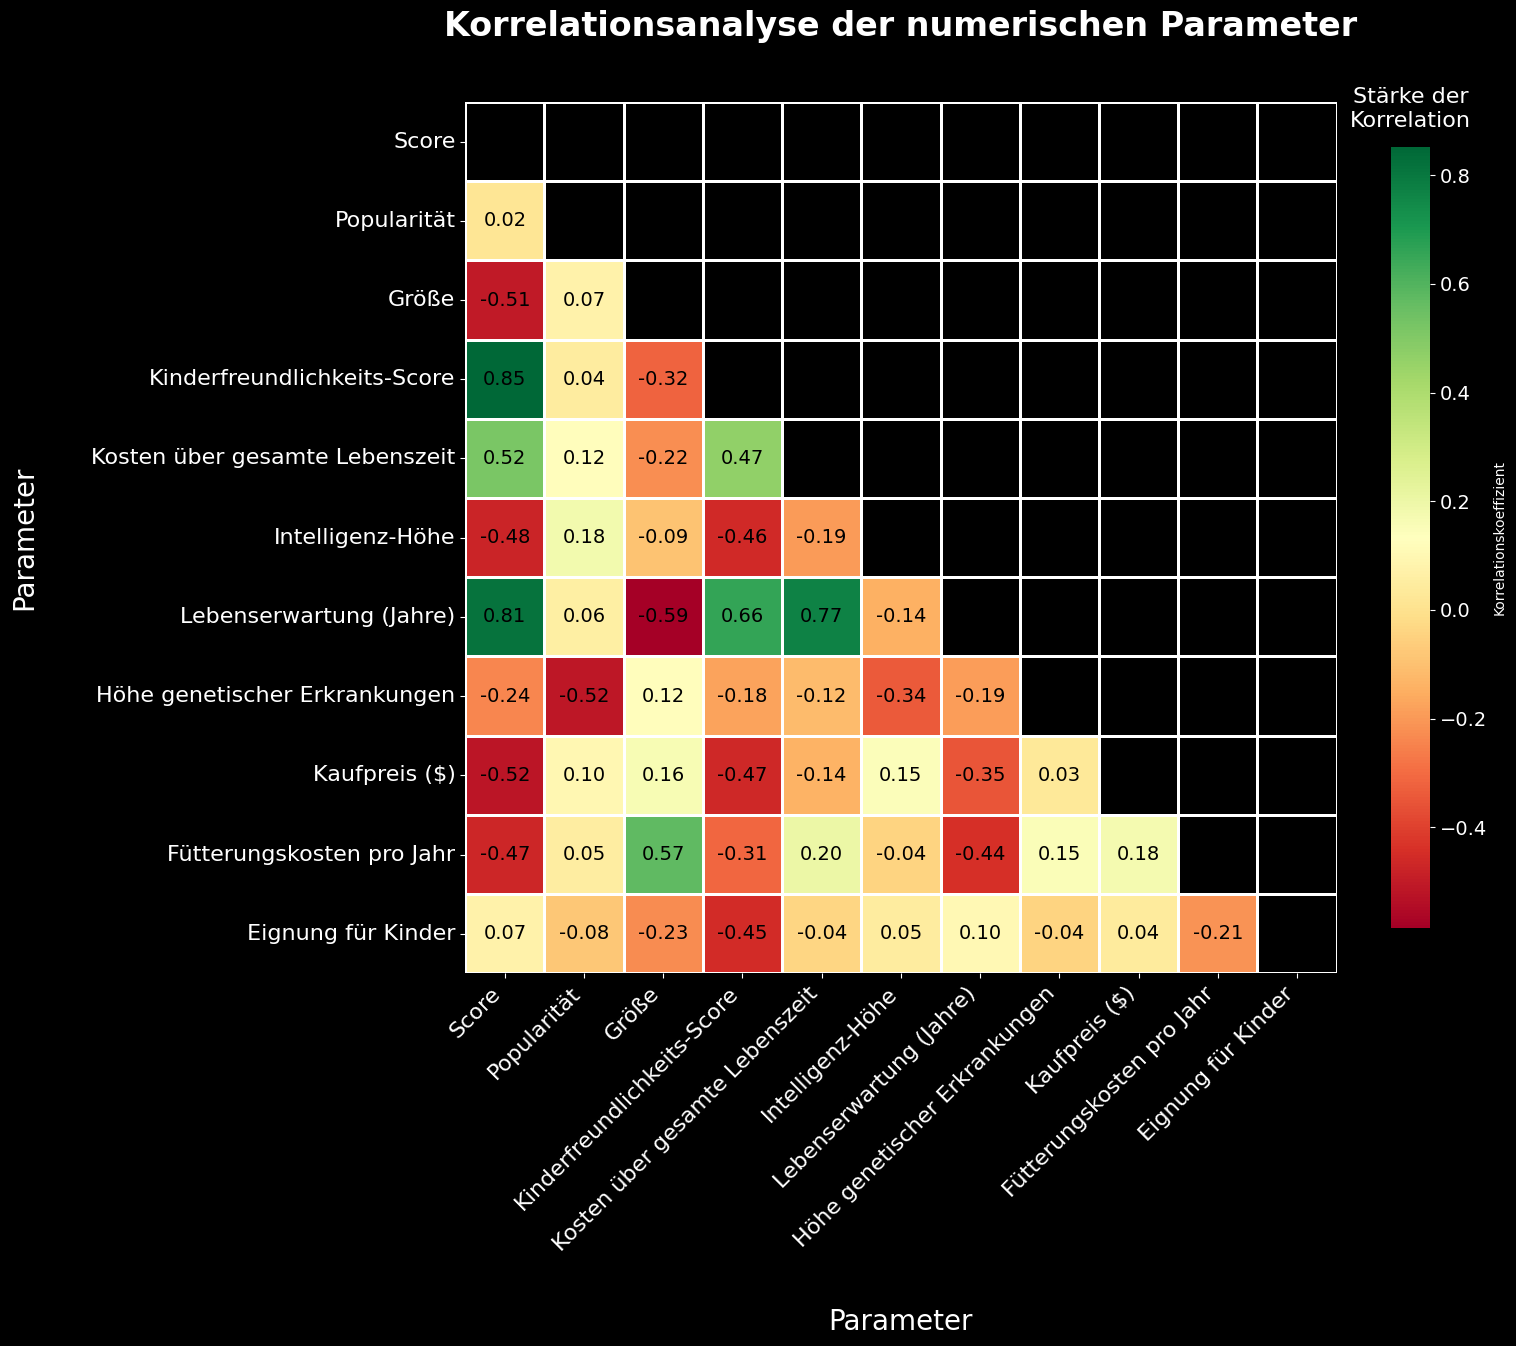

<Figure size 640x480 with 0 Axes>

In [ ]:
def plot_correlation_heatmap(df):
    """
    Erstellt eine optimierte Korrelations-Heatmap mit modernem dunkelgrauen Design.
    
    Args:
        df (pandas.DataFrame): Der zu analysierende Datensatz
        
    Returns:
        matplotlib.figure.Figure: Die erstellte Figure für weitere Anpassungen
    """
    # 1. Numerische Spalten auswählen und deutsche Namen zuweisen
    numeric_df = df.select_dtypes(include=[np.number])
    column_mapping = {
        'score': 'Score',
        'size': 'Größe',
        'score for kids': 'Kinderfreundlichkeits-Score',
        'INTELLIGENCE RANK': 'Intelligenz-Höhe',
        'LONGEVITY(YEARS)': 'Lebenserwartung (Jahre)',
        'popularity ranking': 'Popularität',
        'PURCHASE PRICE': 'Kaufpreis ($)',
        'FOOD COSTS PER YEAR': 'Fütterungskosten pro Jahr',
        'SUITABILITY FOR CHILDREN': ' Eignung für Kinder',
        'NUMBER OF GENETIC AILMENTS': 'Höhe genetischer Erkrankungen',
        '$LIFETIME COST': 'Kosten über gesamte Lebenszeit'
    }
    numeric_df = numeric_df.rename(columns=column_mapping)
    corr = numeric_df.corr()
    
    # 2. Maske für das obere Dreieck
    mask = np.triu(np.ones_like(corr, dtype=bool))
    
    # 3. Plot-Setup mit dunkelgrauem Hintergrund
    plt.style.use('dark_background')
    fig = plt.figure(figsize=(16, 14))  # Größere Darstellung
    
    
    # 4. Heatmap erstellen
    sns.heatmap(
        corr,
        mask=mask,
        annot=True,
        fmt=".2f",
        cmap='RdYlGn',
        square=True,
        linewidths=1.0,  # Breitere Trennlinien
        cbar_kws={
            'label': 'Korrelationskoeffizient',
            'shrink': .8,
            'orientation': 'vertical',
            'pad': 0.05
        },
        annot_kws={
            'fontsize': 14,  # Größere Schrift für Werte
            # 'weight': 'bold',
            'color': 'black'
        }
    )
    
    # 5. Titel und Beschriftungen anpassen
    plt.title(
        'Korrelationsanalyse der numerischen Parameter\n',
        fontsize=24,  # Größerer Titel
        pad=20,
        fontweight='bold',
        color='white',
        ha = 'center'
    )
    plt.xlabel('\nParameter', fontsize=20, labelpad=15, color='white')
    plt.ylabel('Parameter\n', fontsize=20, labelpad=15, color='white')
    
    # 6. Achsenbeschriftungen optimieren
    plt.xticks(rotation=45, ha='right', fontsize=16, color='white')
    plt.yticks(fontsize=16, color='white')
    
    # 7. Layout optimieren
    plt.tight_layout(pad=2.0)
    
    # 8. Farbbalken-Beschriftung anpassen
    cbar = plt.gcf().axes[-1]
    cbar.set_title(
        'Stärke der\nKorrelation', 
        fontsize=16,  # Größere Schrift
        pad=15,
        color='white'
    )
    cbar.tick_params(labelcolor='white', labelsize=14)  # Größere Tick-Labels
    
    # Hintergrundfarbe der gesamten Figur setzen
    fig.patch.set_facecolor('black')
    
    return fig

# Beispielverwendung:
fig = plot_correlation_heatmap(data)

plt.show()
plt.savefig('korrelation_heatmap.png')

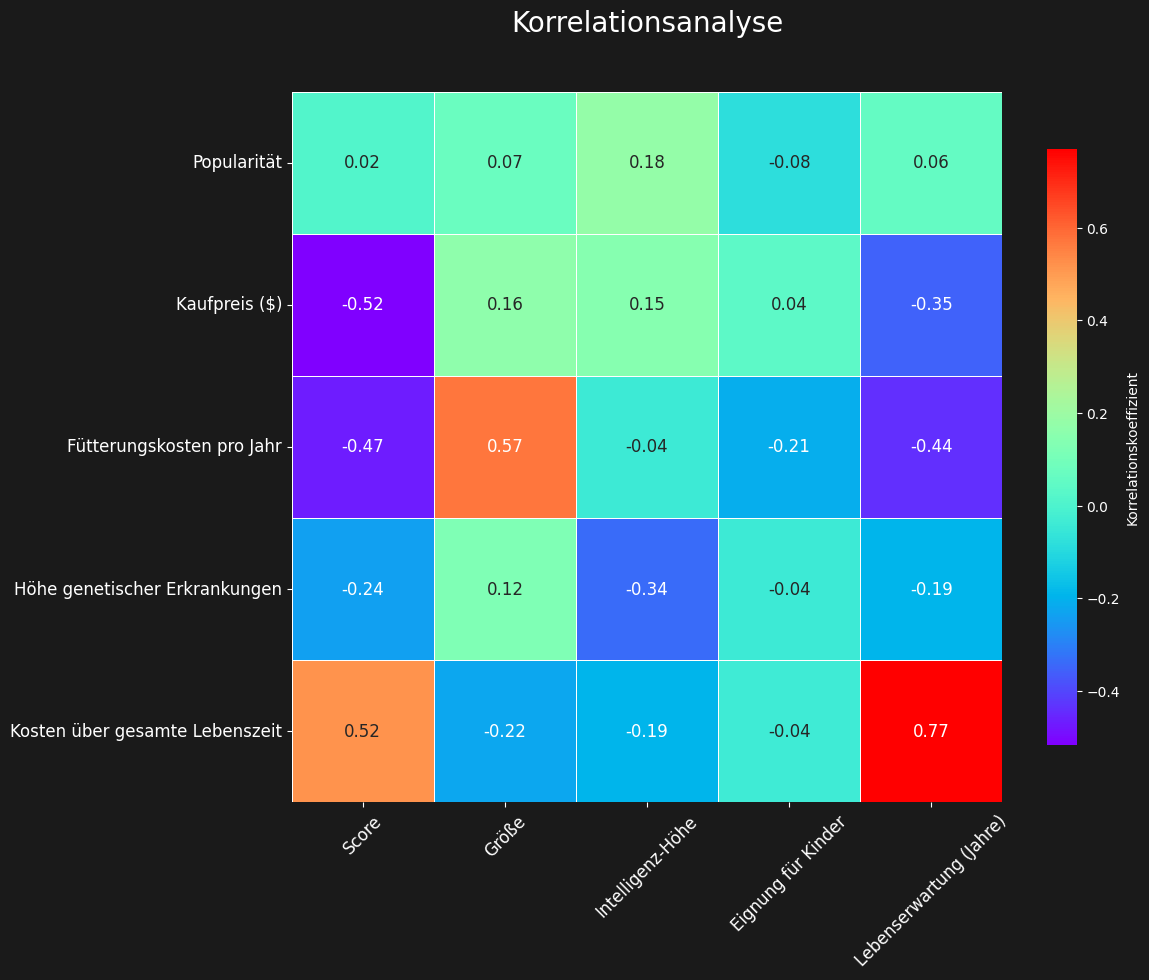

In [ ]:
def plot_correlation_heatmap(df):
    """
    Erstellt eine optimierte Korrelations-Heatmap mit modernem dunkelgrauem Design,
    wobei 5 Parameter auf der X-Achse und 6 andere auf der Y-Achse dargestellt werden.
    """
    # 1. Numerische Spalten auswählen und deutsche Namen zuweisen
    numeric_df = df.select_dtypes(include=[np.number])
    column_mapping = {
        'score': 'Score',
        'size': 'Größe',
        'score for kids': 'Kinderfreundlichkeits-Score',
        'INTELLIGENCE RANK': 'Intelligenz-Höhe',
        'LONGEVITY(YEARS)': 'Lebenserwartung (Jahre)',
        'popularity ranking': 'Popularität',
        'PURCHASE PRICE': 'Kaufpreis ($)',
        'FOOD COSTS PER YEAR': 'Fütterungskosten pro Jahr',
        'SUITABILITY FOR CHILDREN': 'Eignung für Kinder',
        'NUMBER OF GENETIC AILMENTS': 'Höhe genetischer Erkrankungen',
        '$LIFETIME COST': 'Kosten über gesamte Lebenszeit'
    }
    numeric_df = numeric_df.rename(columns=column_mapping)
    
    # Parameter für X- und Y-Achse definieren
    x_params = [
        'Score',
        'Größe',
        'Intelligenz-Höhe',
        'Eignung für Kinder',
        'Lebenserwartung (Jahre)'
    ]
    
    y_params = [
        'Popularität',
        'Kaufpreis ($)',
        'Fütterungskosten pro Jahr',
        'Höhe genetischer Erkrankungen',
        'Kosten über gesamte Lebenszeit'
    ]
    
    # Sicherstellen, dass alle Spalten vorhanden sind
    x_params = [col for col in x_params if col in numeric_df.columns]
    y_params = [col for col in y_params if col in numeric_df.columns]
    
    # Teildatensätze erstellen
    x_data = numeric_df[x_params]
    y_data = numeric_df[y_params]
    
    # Korrelationsmatrix berechnen
    corr_matrix = pd.DataFrame(index=y_params, columns=x_params)
    for y_col in y_params:
        for x_col in x_params:
            corr_matrix.loc[y_col, x_col] = y_data[y_col].corr(x_data[x_col])
    corr_matrix = corr_matrix.astype(float)
    
    # 2. Plot-Setup mit dunkelgrauem Hintergrund
    plt.style.use('dark_background')
    fig, ax = plt.subplots(figsize=(12, 10))
    
    # 3. Heatmap erstellen
    sns.heatmap(
        corr_matrix,
        annot=True,
        fmt=".2f",
        cmap="rainbow",
        square=True,
        linewidths=0.5,
        cbar_kws={
            'label': 'Korrelationskoeffizient',
            'shrink': 0.8
        },
        annot_kws={'fontsize': 12},
        ax=ax
    )
    
    # 4. Titel und Beschriftungen anpassen
    ax.set_title('Korrelationsanalyse\n', fontsize=20, pad=20, color='white')
    #ax.set_xlabel('\nX-Achse Parameter', fontsize=14, color='white')
    #ax.set_ylabel('Y-Achse Parameter\n', fontsize=14, color='white')
    
    # 5. Achsenbeschriftungen
    ax.tick_params(axis='x', colors='white', labelsize=12, rotation=45)
    ax.tick_params(axis='y', colors='white', labelsize=12, rotation=0)
    
    # 6. Layout optimieren
    plt.tight_layout()
    
    # Hintergrundfarbe
    fig.patch.set_facecolor('#1a1a1a')
    
    return fig

# Beispielverwendung:
fig = plot_correlation_heatmap(data)
#plt.savefig('korrelation_heatmap.png', dpi=300, facecolor='#1a1a1a')
plt.show()